### Importação das bibliotecas e base de dados
Importa a biblioteca pandas, carrega a base de dados CSV a partir do Google Drive e exibe as primeiras 5 linhas da tabela para visualização.

In [184]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

data = pd.read_csv('data_tratada.csv')

data.dropna(inplace=True)

data['Forma de trabalho atual'] = data['Forma de trabalho atual'].replace('Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)', 'Híbrido flexível')
data['Forma de trabalho atual'] = data['Forma de trabalho atual'].replace('Modelo híbrido com dias fixos de trabalho presencial', 'Híbrido fixo')

data['Forma de trabalho ideal'] = data['Forma de trabalho ideal'].replace('Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)', 'Híbrido flexível')
data['Forma de trabalho ideal'] = data['Forma de trabalho ideal'].replace('Modelo híbrido com dias fixos de trabalho presencial', 'Híbrido fixo')

print(f'Dimensões: {data.shape}')
print(f'Colunas: {data.columns}')

data.head()

Dimensões: (4753, 21)
Colunas: Index(['Idade', 'Genero', 'Cor/Raca', 'Trabalho domestico', 'PCD',
       'Estado onde mora', 'Região onde mora', 'Roubos de veículo',
       'Roubos de carro', 'Roubos de moto', 'Roubos de bicicleta',
       'Roubos fora do domicilio', 'Nivel de ensino', 'Area de formação',
       'Situação atual de trabalho', 'Cargo atual', 'Nivel', 'Faixa salarial',
       'Tempo de experiencia', 'Forma de trabalho atual',
       'Forma de trabalho ideal'],
      dtype='object')


,Idade,Genero,Cor/Raca,Trabalho domestico,PCD,Estado onde mora,Região onde mora,Roubos de veículo,Roubos de carro,Roubos de moto,...,Roubos fora do domicilio,Nivel de ensino,Area de formação,Situação atual de trabalho,Cargo atual,Nivel,Faixa salarial,Tempo de experiencia,Forma de trabalho atual,Forma de trabalho ideal
0,31.0,Masculino,Branca,16.5,Não,Minas Gerais (MG),Sudeste,92.0,67.0,25.0,...,565.0,Doutorado ou Phd,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Híbrido flexível,Modelo 100% remoto
1,30.0,Masculino,Branca,16.5,Não,Espírito Santo (ES),Sudeste,92.0,67.0,25.0,...,565.0,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empreendedor ou Empregado (CNPJ),Analista de BI/BI Analyst,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 3 a 4 anos,Modelo 100% remoto,Modelo 100% remoto
2,37.0,Feminino,Amarela,17.0,Não,São Paulo (SP),Sudeste,92.0,67.0,25.0,...,565.0,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Analista de Dados/Data Analyst,Júnior,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,Híbrido flexível,Modelo 100% remoto
3,34.0,Masculino,Branca,16.5,Não,Minas Gerais (MG),Sudeste,92.0,67.0,25.0,...,565.0,Doutorado ou Phd,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),Analista de Dados/Data Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Modelo 100% remoto,Modelo 100% remoto
4,30.0,Masculino,Branca,16.5,Não,Rio de Janeiro (RJ),Sudeste,92.0,67.0,25.0,...,565.0,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Empreendedor ou Empregado (CNPJ),Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Modelo 100% remoto,Modelo 100% remoto


### Gerando base de treinamento e teste
Seleciona os dados de teste e o alvo e codifica os valores categóricos para numéricos e divide a base de dados em treino (80%) e teste (20%)

In [185]:
X_dict = data.iloc[:, 0:(data.shape[1]-1)].T.to_dict().values()
vect = DictVectorizer(sparse=False)
X = vect.fit_transform(X_dict)

le = LabelEncoder()
y = le.fit_transform(data.iloc[:, data.shape[1]-1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Treinando o Random Forest
Treina o RandomForest e guarda todas as acurácias em um array, foi separado duas árvores para fins de comparação. Uma com melhor desempenho de acurácia e outra com o pior desempenho

In [188]:
forest = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=5)
forest.fit(X_train, y_train)
print(f'Acurácia: {forest.score(X_train, y_train)}')

accuracies = {}

for i, tree_model in enumerate(forest.estimators_):
  y_pred = tree_model.predict(X_test)
  acc_score = accuracy_score(y_test, y_pred)
  accuracies[i] = acc_score

best_tree = max(accuracies, key=accuracies.get)
worst_tree = min(accuracies, key=accuracies.get)

print(f'Maior acurácia: {accuracies[best_tree]}')
print(f'Menor acurácia: {accuracies[worst_tree]}')

best_y_pred = forest.estimators_[best_tree].predict(X_test)
worst_y_pred = forest.estimators_[worst_tree].predict(X_test)

print(classification_report(y_test, best_y_pred))
print(classification_report(y_test, worst_y_pred))

Acurácia: 0.6641241451867438
Maior acurácia: 0.668769716088328
Menor acurácia: 0.4784437434279706
              precision    recall  f1-score   support

           0       0.47      0.10      0.17        69
           1       0.65      0.71      0.68       445
           2       0.00      0.00      0.00        21
           3       0.70      0.75      0.72       416

    accuracy                           0.67       951
   macro avg       0.45      0.39      0.39       951
weighted avg       0.64      0.67      0.65       951

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.52      0.39      0.44       445
           2       0.00      0.00      0.00        21
           3       0.46      0.68      0.55       416

    accuracy                           0.48       951
   macro avg       0.24      0.27      0.25       951
weighted avg       0.44      0.48      0.45       951



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

### Matriz de confusão da melhor árvore
Aqui foi feita a visualização da matriz de confusão da árvore com melhor desempenho, sendo mostrado uma confusão entre remoto e hibrído

Matriz de confusão: 
[[  7  53   0   9]
 [  6 317   0 122]
 [  1  15   0   5]
 [  1 103   0 312]]
Matriz de confusão formatada: 
                        Híbrido fixo  Híbrido flexível  \
Híbrido fixo                       7                53   
Híbrido flexível                   6               317   
Modelo 100% presencial             1                15   
Modelo 100% remoto                 1               103   

                        Modelo 100% presencial  Modelo 100% remoto  
Híbrido fixo                                 0                   9  
Híbrido flexível                             0                 122  
Modelo 100% presencial                       0                   5  
Modelo 100% remoto                           0                 312  


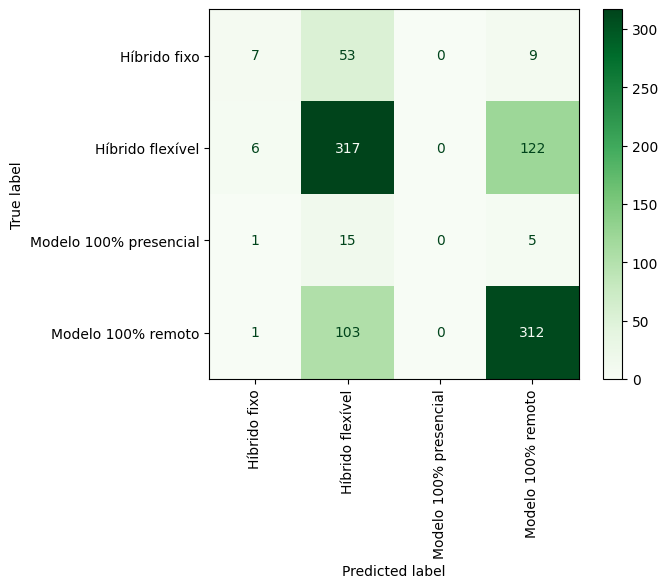

In [189]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

# Melhor arvore
best_cnf_matrix = confusion_matrix(y_test, best_y_pred)
print(f'Matriz de confusão: \n{best_cnf_matrix}')

df_cnf_matrix = pd.DataFrame(best_cnf_matrix, index=le.classes_, columns=le.classes_)
print(f'Matriz de confusão formatada: \n{df_cnf_matrix}')

display = ConfusionMatrixDisplay.from_estimator(forest.estimators_[best_tree], X_test, y_test, display_labels=le.classes_, cmap=plt.cm.Greens)

plt.xticks(rotation=90)
plt.show()

### Matriz de confusão da pior árvore
Enquanto aqui, é descrito a matriz de confusão da da árvore com menor desempenho. Aqui a confusão ja é mais generalizada

Matriz de confusão: 
[[  7  53   0   9]
 [  6 317   0 122]
 [  1  15   0   5]
 [  1 103   0 312]]
Matriz de confusão formatada: 
                        Híbrido fixo  Híbrido flexível  \
Híbrido fixo                       0                21   
Híbrido flexível                   2               172   
Modelo 100% presencial             0                 7   
Modelo 100% remoto                 1               132   

                        Modelo 100% presencial  Modelo 100% remoto  
Híbrido fixo                                 0                  48  
Híbrido flexível                             0                 271  
Modelo 100% presencial                       0                  14  
Modelo 100% remoto                           0                 283  


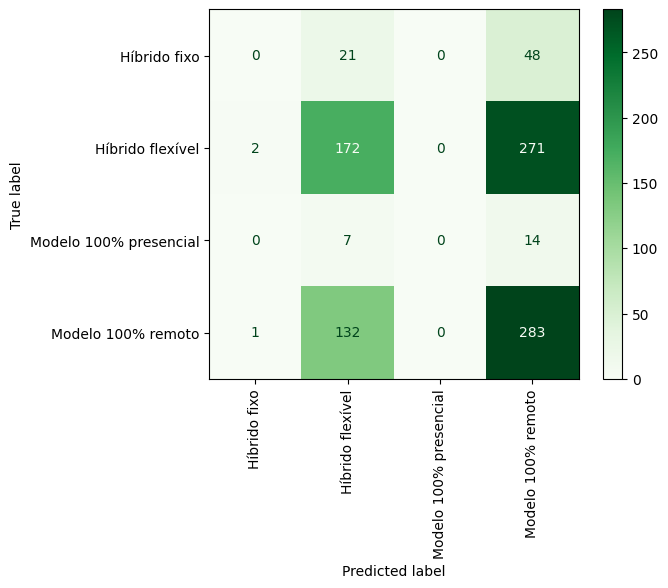

In [190]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

# Melhor arvore
worst_cnf_matrix = confusion_matrix(y_test, worst_y_pred)
print(f'Matriz de confusão: \n{best_cnf_matrix}')

df_cnf_matrix = pd.DataFrame(worst_cnf_matrix, index=le.classes_, columns=le.classes_)
print(f'Matriz de confusão formatada: \n{df_cnf_matrix}')

display = ConfusionMatrixDisplay.from_estimator(forest.estimators_[worst_tree], X_test, y_test, display_labels=le.classes_, cmap=plt.cm.Greens)

plt.xticks(rotation=90)
plt.show()

### Visualização de um gráfico de importância da melhor árvore
Foi feito uma vizualização dos valores mais importantes na construção da melhor árvore. Os atributos mais importantes levam em consideração a forma de trabalho atual do profissional

Importância das variáveis: 
Forma de trabalho atual=Híbrido flexível                                           0.371220
Forma de trabalho atual=Modelo 100% presencial                                     0.327551
Forma de trabalho atual=Híbrido fixo                                               0.100228
Situação atual de trabalho=Empregado (CLT)                                         0.039191
Cargo atual=Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect    0.021958
Roubos de veículo                                                                  0.018321
Tempo de experiencia=Mais de 10 anos                                               0.015263
Cargo atual=Analista de BI/BI Analyst                                              0.013826
Nivel de ensino=Pós-graduação                                                      0.010544
Nivel de ensino=Doutorado ou Phd                                                   0.009981
dtype: float64


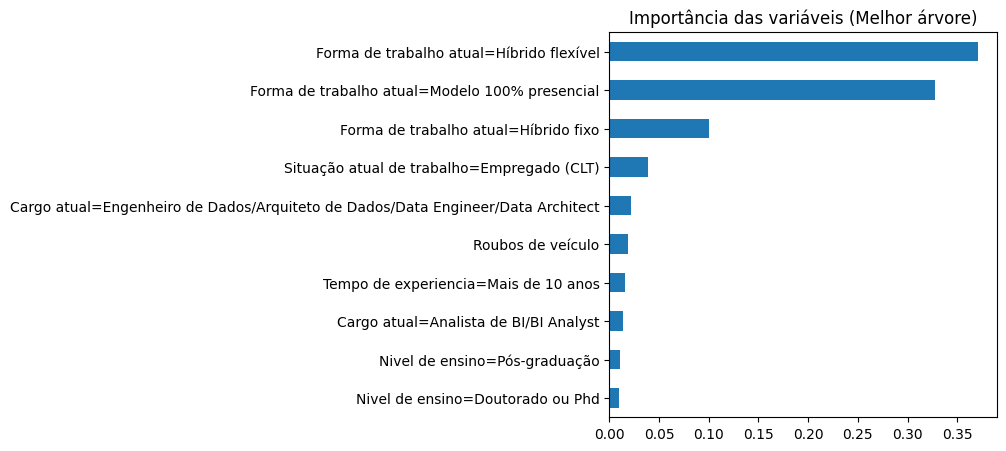

In [191]:
best_importance = forest.estimators_[best_tree].feature_importances_

best_importance_series = pd.Series(best_importance, index=vect.get_feature_names_out())
best_importance_series = best_importance_series.sort_values(ascending=False).head(10)

print(f'Importância das variáveis: \n{best_importance_series}')

plt.figure(figsize=(5, 5))
best_importance_series.plot(kind='barh', legend=False)
plt.title('Importância das variáveis (Melhor árvore)')
plt.gca().invert_yaxis()

### Visualização do gráfico de importância da pior árvore
Entretanto, aqui a visualização dos atributos mais importantes deu mais ênfase em aspectos demográficos, como onde a pessoa reside e seu gênero


Importância das variáveis: 
Estado onde mora=Bahia (BA)                         0.159811
Estado onde mora=São Paulo (SP)                     0.098085
Genero=Masculino                                    0.095718
Cargo atual=Outra Opção                             0.071089
Forma de trabalho atual=Modelo 100% presencial      0.069734
Cargo atual=Analista de Suporte/Analista Técnico    0.069437
Região onde mora=Norte                              0.061659
Cor/Raca=Parda                                      0.053307
Cargo atual=Analytics Engineer                      0.050324
Faixa salarial=de R$ 8.001/mês a R$ 12.000/mês      0.041223
dtype: float64


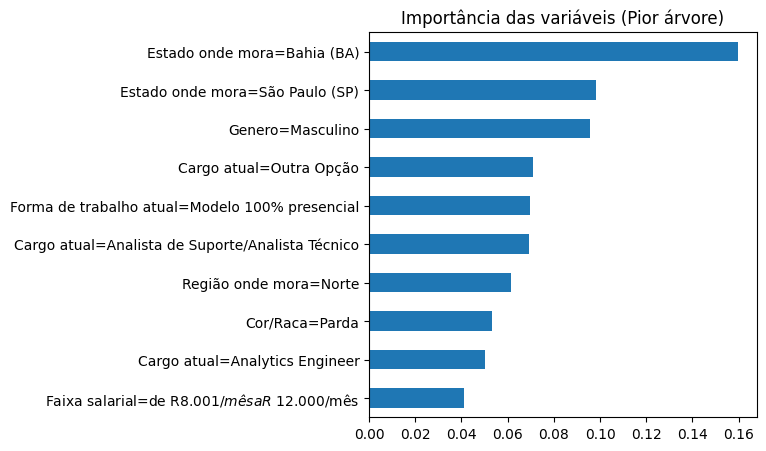

In [192]:
worst_importance = forest.estimators_[worst_tree].feature_importances_

worst_importance_series = pd.Series(worst_importance, index=vect.get_feature_names_out())
worst_importance_series = worst_importance_series.sort_values(ascending=False).head(10)

print(f'\nImportância das variáveis: \n{worst_importance_series}')

plt.figure(figsize=(5, 5))
worst_importance_series.plot(kind='barh', legend=False)
plt.title('Importância das variáveis (Pior árvore)')
plt.gca().invert_yaxis()

### Visualização do RandomForest
Uma vizualização de todas as 100 árvores com suas respectivas acurácias

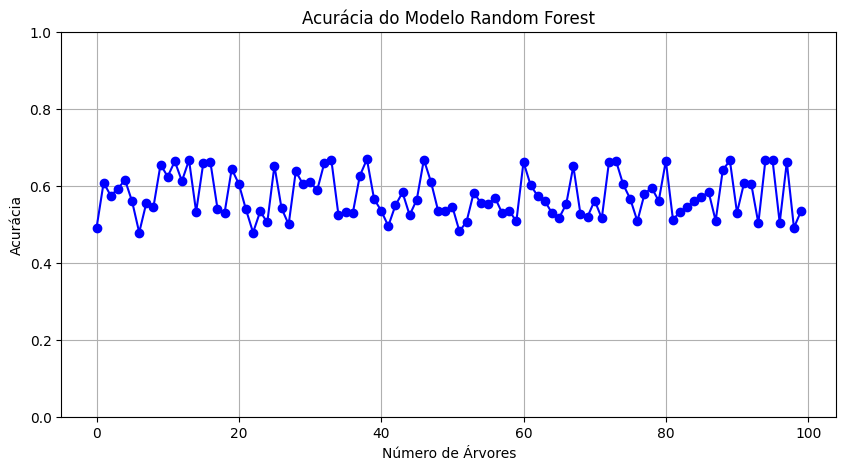

In [193]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(range(len(accuracies.items())), accuracies.values(), marker='o', linestyle='-', color='blue')
plt.title('Acurácia do Modelo Random Forest')
plt.xlabel('Número de Árvores')
plt.ylabel('Acurácia')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

### Visualização da Árvore com melhor desempenho
Gerado uma visualização da árvore, que foi limitada um max_depth=5

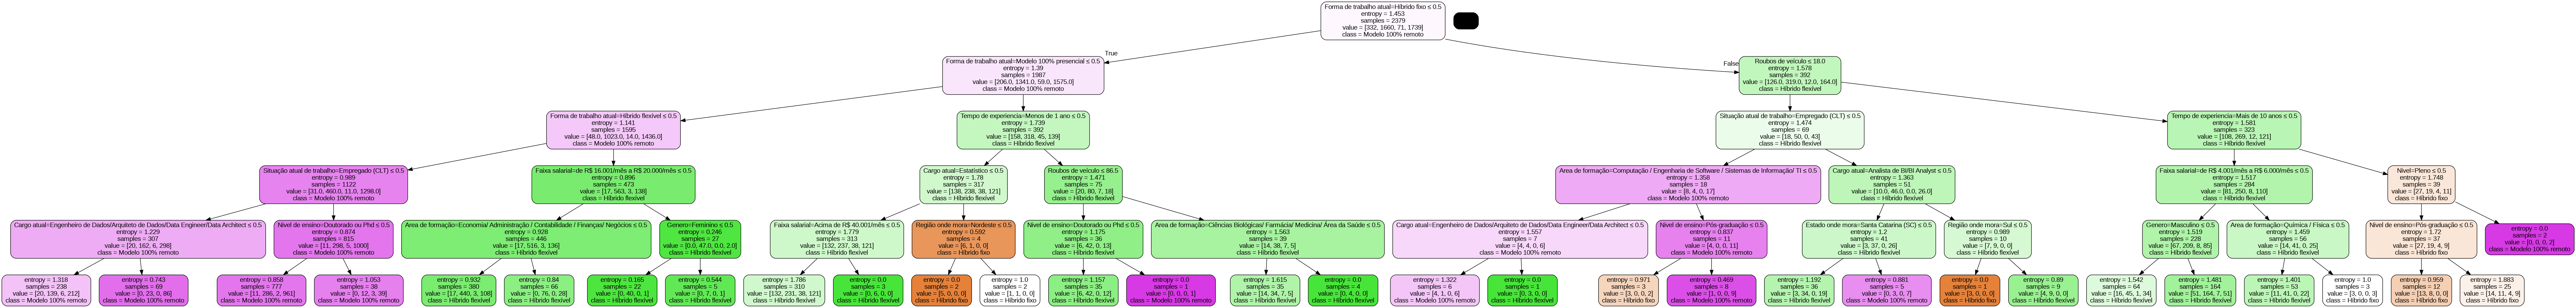

In [195]:
import pydotplus
from sklearn import tree
from IPython.display import Image

dot_data = tree.export_graphviz(forest.estimators_[best_tree], out_file=None, feature_names=vect.get_feature_names_out(), class_names=le.classes_, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())